# Import Dependencies

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import scipy.stats as st

# Import Data

In [111]:
data_working = pd.read_csv("output/data_working.csv")
data_working.head()

,Unnamed: 0,Country,Year,Union Density,Gini Coefficient,CPI,Region,Color,Group
0,0,Hungary,2009,11.9,0.245,95.369304,East,m,50
1,1,Hungary,2015,9.0,0.291,111.384411,East,m,50
2,2,Poland,2009,16.3,0.305,97.484226,East,m,50
3,3,Poland,2010,18.3,0.307,100.000000,East,m,50
4,4,Poland,2011,17.0,0.304,104.239401,East,m,50


In [112]:
data_working=data_working.drop(['Unnamed: 0','CPI'],axis=1)
data_working

,Country,Year,Union Density,Gini Coefficient,Region,Color,Group
0,Hungary,2009,11.9,0.245,East,m,50
1,Hungary,2015,9.0,0.291,East,m,50
2,Poland,2009,16.3,0.305,East,m,50
3,Poland,2010,18.3,0.307,East,m,50
4,Poland,2011,17.0,0.304,East,m,50
...,...,...,...,...,...,...,...
269,United States,2013,10.8,0.392,US,b,130
270,United States,2014,10.7,0.389,US,b,130
271,United States,2015,10.6,0.384,US,b,130
272,United States,2016,10.3,0.385,US,b,130


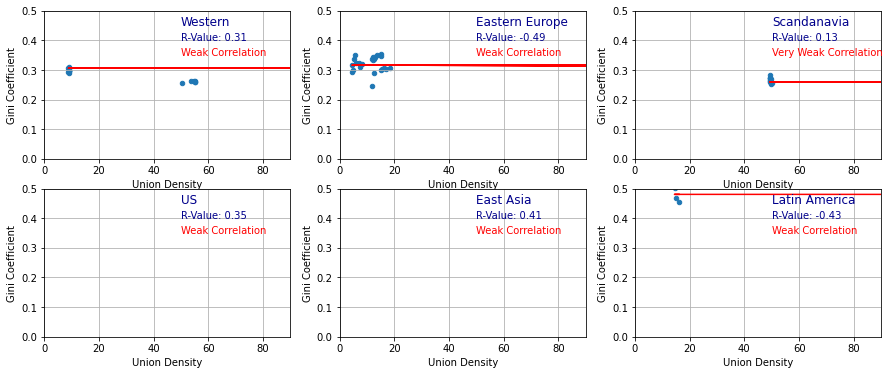

In [115]:
fig, ax = plt.subplots(2, 3, figsize=(15, 6))

i = 0
for region in filtered_dict:
    current_ax = ax[i // 3][i % 3]
    filtered_dict[region]["df"].plot.scatter(x="Union Density", y="Gini Coefficient", ax=current_ax, grid=True)
    current_ax.set_ylim(0, 0.5)
    current_ax.set_xlim(0, 90)
    
    x = filtered_dict[region]["df"]["Union Density"]
    y = filtered_dict[region]["df"]["Gini Coefficient"]
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y = {round(slope, 3)}x + {round(intercept, 2)}"
    current_ax.plot(x, regress_values, "r-")
    
    current_ax.annotate(region, (50,0.45), fontsize=12, color="darkblue")
    current_ax.annotate(f"R-Value: {round(rvalue,2)}", (50,0.40), fontsize=10, color="darkblue")
    
    correlation = "No Correlation"
    if abs(rvalue) < 0.1:
        correlation = "No Correlation"
    elif abs(rvalue) < 0.3:
        correlation = "Very Weak Correlation"
    elif abs(rvalue) < 0.5:
        correlation = "Weak Correlation"
    elif abs(rvalue) < 0.7:
        correlation = "Moderate Correlation"
    elif abs(rvalue) < 1:
        correlation = "Strong Correlation"
    current_ax.annotate(correlation, (50,0.35), fontsize=10, color="red")    
    
    i += 1
    
    plt.savefig("output/regional_regression_udvgc.png")
    
    

## Plot Union Density with Gini Coefficient by region

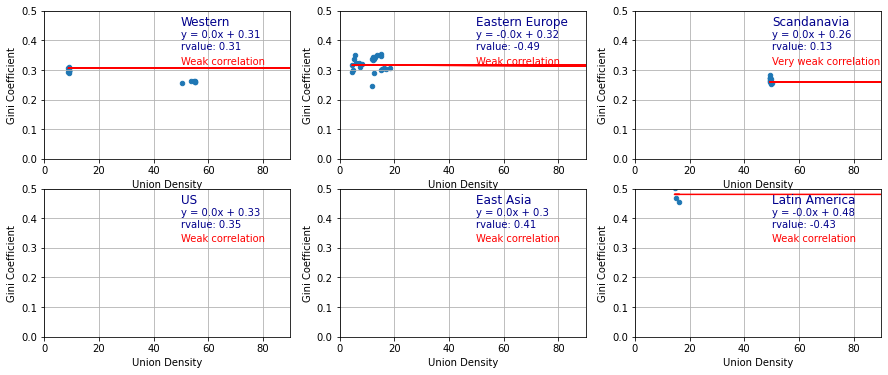

In [75]:
fig, ax = plt.subplots(2, 3, figsize=(15, 6))

i = 0
for region in filtered_dict:
#     x_position=df[region]["x"]
#     y_position=df[region]["y"]
    current_ax = ax[i // 3][i % 3]
    filtered_dict[region]["df"].plot.scatter(x="Union Density", y="Gini Coefficient", ax=current_ax, grid=True)
#     ax[x_position][y_position].set_title(region)
    current_ax.set_ylim(0, 0.5)
    current_ax.set_xlim(0, 90)
    
    x = filtered_dict[region]["df"]["Union Density"]
    y = filtered_dict[region]["df"]["Gini Coefficient"]
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y = {round(slope, 3)}x + {round(intercept, 2)}"
    current_ax.plot(x, regress_values, "r-")
    
    current_ax.annotate(region, (50,0.45), fontsize=12, color="darkblue")
    current_ax.annotate(line_eq, (50,0.41), fontsize=10, color="darkblue")
    current_ax.annotate(f"rvalue: {round(rvalue,2)}", (50,0.37), fontsize=10, color="darkblue")
    
    correlation = "No correlation"
    if abs(rvalue) < 0.1:
        correlation = "No correlation"
    elif abs(rvalue) < 0.3:
        correlation = "Very weak correlation"
    elif abs(rvalue) < 0.5:
        correlation = "Weak correlation"
    elif abs(rvalue) < 0.7:
        correlation = "Moderate correlation"
    elif abs(rvalue) < 1:
        correlation = "Strong correlation"
    current_ax.annotate(correlation, (50,0.32), fontsize=10, color="red")    
    
    i += 1

In [82]:
data_working
data_working["Color"] = ""
data_working["Group"] = ""
data_working.head()

,Country,Year,Union %,Gini,CPI,Region,Color,Group
0,Hungary,2009,11.9,0.245,95.369304,East,,
1,Hungary,2015,9.0,0.291,111.384411,East,,
2,Poland,2009,16.3,0.305,97.484226,East,,
3,Poland,2010,18.3,0.307,100.000000,East,,
4,Poland,2011,17.0,0.304,104.239401,East,,


In [83]:
for index, row in data_working.iterrows():
    if row["Country"] in west: 
        data_working.loc[index,"Group"] = 10
        data_working.loc[index,"Color"] = "c"
    if row["Country"] in east: 
        data_working.loc[index,"Group"] = 50 
        data_working.loc[index,"Color"] = "m"
    if row["Country"] in scandinavian: 
        data_working.loc[index,"Group"] = 95
        data_working.loc[index,"Color"] = "y"
    if row["Country"] in us: 
        data_working.loc[index,"Group"] = 130 
        data_working.loc[index,"Color"] = "b"
    if row["Country"] in asia: 
        data_working.loc[index,"Group"] = 160
        data_working.loc[index,"Color"] = "g"
    if row["Country"] in latin: 
        data_working.loc[index,"Group"] = 190
        data_working.loc[index,"Color"] = "r"
data_working.head()

,Country,Year,Union %,Gini,CPI,Region,Color,Group
0,Hungary,2009,11.9,0.245,95.369304,East,m,50
1,Hungary,2015,9.0,0.291,111.384411,East,m,50
2,Poland,2009,16.3,0.305,97.484226,East,m,50
3,Poland,2010,18.3,0.307,100.000000,East,m,50
4,Poland,2011,17.0,0.304,104.239401,East,m,50


In [84]:
from matplotlib import cm
cmap = cm.get_cmap('Spectral')

Text(60, 0.36, 'Moderate correlation')

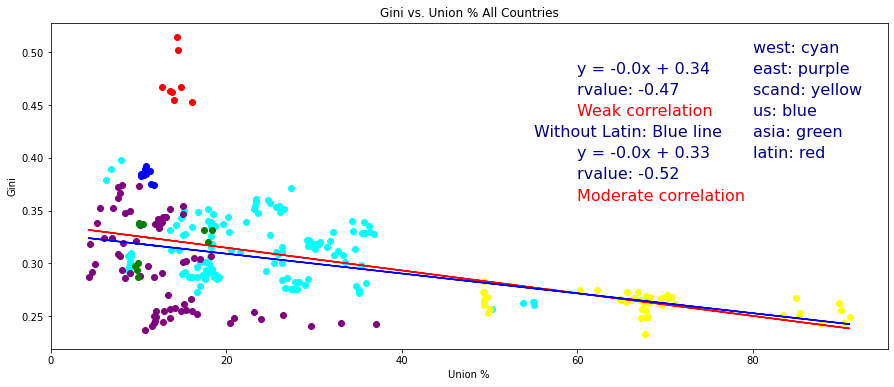

In [88]:
plt.figure(figsize=(15, 6))
i = 0
for region in df:
    x = df[region]["df"]["Union %"]
    y = df[region]["df"]["Gini"]
    plt.scatter(x, y, c=df[region]["color"] )
    plt.annotate(f"{region}: {df[region]['color']}", (80, 0.5 - i*0.02), fontsize=16, color="darkblue"  )
    i += 1

x = data_working["Union %"]
y = data_working["Gini"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.plot(x, regress_values, "r-")
plt.xlabel("Union %")
plt.ylabel("Gini")
plt.title("Gini vs. Union % All Countries")

# plt.annotate("With Latin: Red line", (55,0.5), fontsize=16, color="darkblue")
plt.annotate(line_eq, (60,0.48), fontsize=16, color="darkblue")
plt.annotate(f"rvalue: {round(rvalue,2)}", (60,0.46), fontsize=16, color="darkblue")

correlation = "No correlation"
if abs(rvalue) > 0.25:
    correlation = "Very weak correlation"
if abs(rvalue) > 0.3:
    correlation = "Weak correlation"
elif abs(rvalue) > 0.5:
    correlation = "Moderate correlation"
elif abs(rvalue) > 0.7:
    correlation = "Strong correlation"
plt.annotate(correlation, (60,0.44), fontsize=16, color="red")    


data_working1 = data_working[data_working["Region"] != "Latin"]
x1 = data_working1["Union %"]
y1 = data_working1["Gini"]
(slope1, intercept1, rvalue1, pvalue1, stderr1) = st.linregress(x1, y1)
regress_values1 = x1 * slope1 + intercept1
line_eq1 = f"y = {round(slope1, 2)}x + {round(intercept1, 2)}"
plt.plot(x1, regress_values1, "b-")

plt.annotate("Without Latin: Blue line", (55,0.42), fontsize=16, color="darkblue")
plt.annotate(line_eq1, (60,0.4), fontsize=16, color="darkblue")
plt.annotate(f"rvalue: {round(rvalue1,2)}", (60,0.38), fontsize=16, color="darkblue")

correlation = "No correlation"
if abs(rvalue1) < 0.3:
    correlation = "Very weak correlation"
elif abs(rvalue1) < 0.5:
    correlation = "Weak correlation"
elif abs(rvalue1) < 0.7:
    correlation = "Moderate correlation"
elif abs(rvalue1) < 1:
    correlation = "Strong correlation"
plt.annotate(correlation, (60,0.36), fontsize=16, color="red")    

In [9]:
data_working1 = data_working[data_working["Region"] != "Latin"]
data_working1

NameError: name 'data_working' is not defined

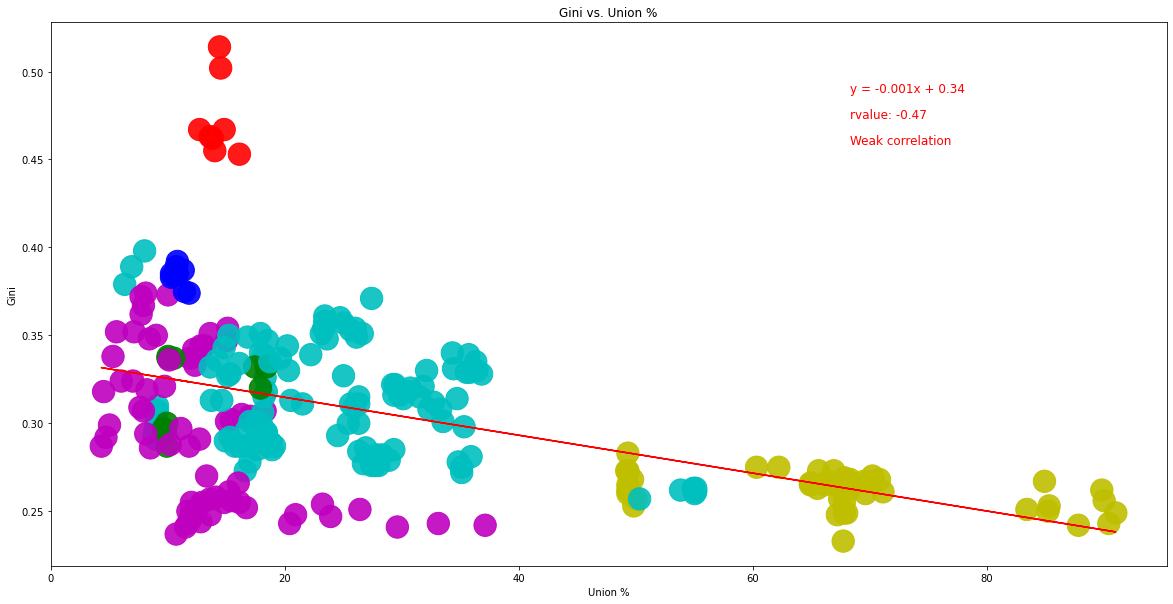

In [90]:
def linear_regression1(df, x_col, y_col, **kwargs):
    """
    df: dataframe
    x: string, column name
    y: string, column name
    """
    import matplotlib.pyplot as plt
    import scipy.stats as st

    plt.figure(figsize=kwargs["figsize"]) if "figsize" in kwargs else plt.figure()

    x = df[x_col]
    y = df[y_col]
    color = df["Color"]
    plt.scatter(x, y, s=500, c=color, alpha=0.9)
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y = {round(slope, 3)}x + {round(intercept, 2)}"
    plt.plot(x, regress_values, "r-")

    xy = kwargs["xy"] if "xy" in kwargs else (x.max() * 0.75, y.max() * 0.95)
    fontsize = kwargs["fontsize"] if "fontsize" in kwargs else 12
    color = kwargs["color"] if "color" in kwargs else "red"
    plt.annotate(line_eq, xy, fontsize=fontsize, color=color)
    px, py = xy
    plt.annotate(f"rvalue: {round(rvalue, 2)}", (px, py * 0.97), fontsize=fontsize, color=color)
    correlation = "No correlation"
    if abs(rvalue) > 0.3:
        correlation = "Weak correlation"
    elif abs(ravlue) > 0.5:
        correlation = "Moderate correlation"
    elif abs(ravlue) > 0.7:
        correlation = "Strong correlation"
    plt.annotate(correlation, (px, py * 0.94), fontsize=fontsize, color=color)    
       
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f"{y_col} vs. {x_col}")

    
linear_regression1(data_working, x_col="Union %", y_col="Gini", figsize=(20,10))

<AxesSubplot:>

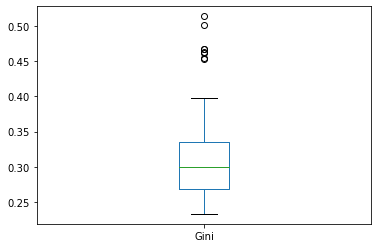

In [91]:
data_working["Gini"].plot.box()

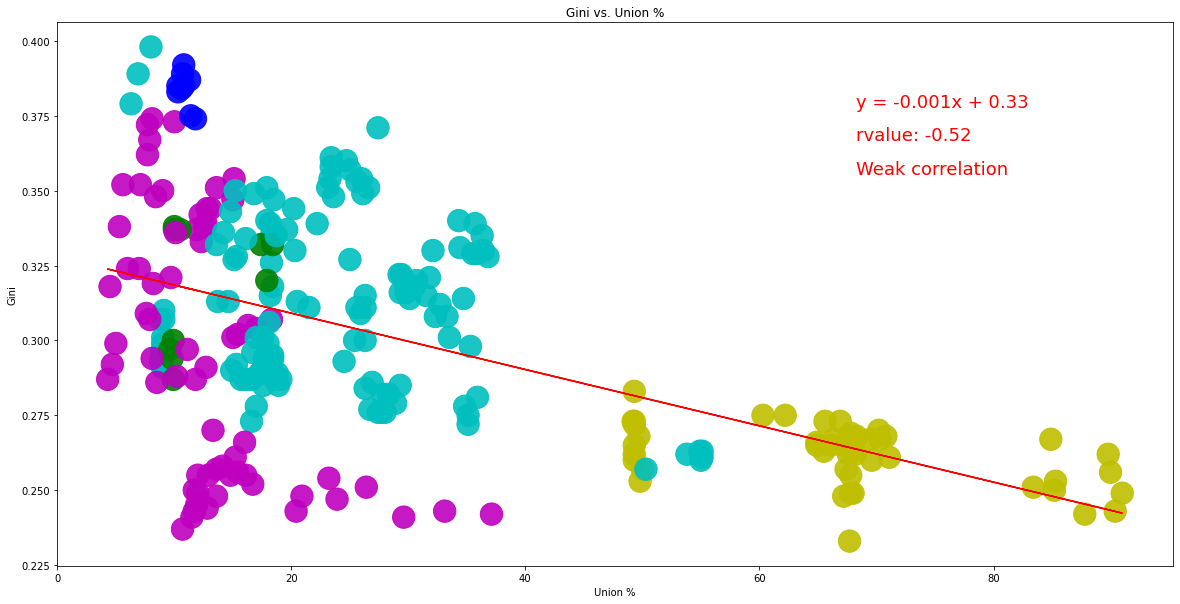

In [92]:
df1 = data_working[data_working["Region"] != "Latin"]
linear_regression1(df1, x_col="Union %", y_col="Gini", figsize=(20,10), fontsize=18)

In [93]:
data_working.head()

,Country,Year,Union %,Gini,CPI,Region,Color,Group
0,Hungary,2009,11.9,0.245,95.369304,East,m,50
1,Hungary,2015,9.0,0.291,111.384411,East,m,50
2,Poland,2009,16.3,0.305,97.484226,East,m,50
3,Poland,2010,18.3,0.307,100.000000,East,m,50
4,Poland,2011,17.0,0.304,104.239401,East,m,50


<Figure size 432x288 with 0 Axes>

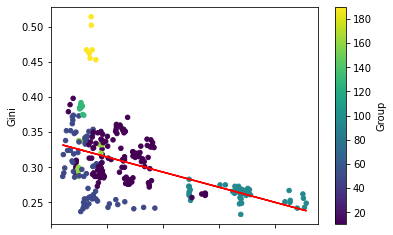

In [94]:
plt.figure()
data_working.plot.scatter(x="Union %", y="Gini", c="Group", colormap="viridis")
plt.plot(x, regress_values, "r-")

C:\Users\berry\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


Country
Australia          AxesSubplot(0.125,0.125;0.775x0.755)
Austria            AxesSubplot(0.125,0.125;0.775x0.755)
Belgium            AxesSubplot(0.125,0.125;0.775x0.755)
Canada             AxesSubplot(0.125,0.125;0.775x0.755)
Chile              AxesSubplot(0.125,0.125;0.775x0.755)
Czech Republic     AxesSubplot(0.125,0.125;0.775x0.755)
Denmark            AxesSubplot(0.125,0.125;0.775x0.755)
Estonia            AxesSubplot(0.125,0.125;0.775x0.755)
Finland            AxesSubplot(0.125,0.125;0.775x0.755)
France             AxesSubplot(0.125,0.125;0.775x0.755)
Germany            AxesSubplot(0.125,0.125;0.775x0.755)
Greece             AxesSubplot(0.125,0.125;0.775x0.755)
Hungary            AxesSubplot(0.125,0.125;0.775x0.755)
Iceland            AxesSubplot(0.125,0.125;0.775x0.755)
Ireland            AxesSubplot(0.125,0.125;0.775x0.755)
Israel             AxesSubplot(0.125,0.125;0.775x0.755)
Italy              AxesSubplot(0.125,0.125;0.775x0.755)
Japan              AxesSubplot(0.125,0.1

<Figure size 432x288 with 0 Axes>

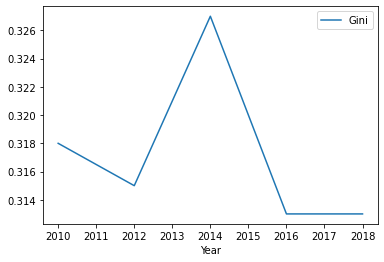

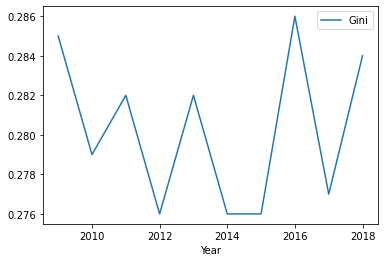

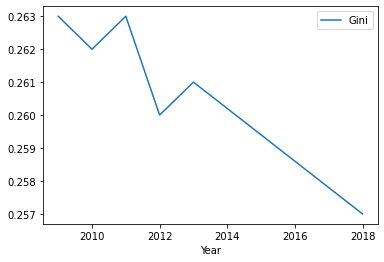

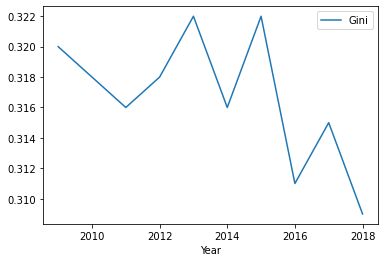

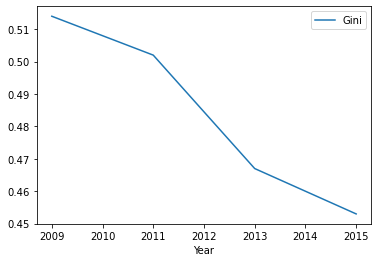

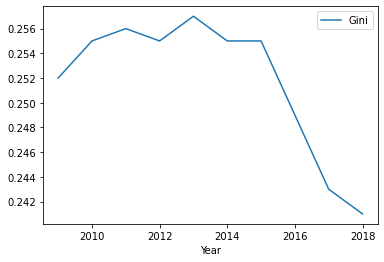

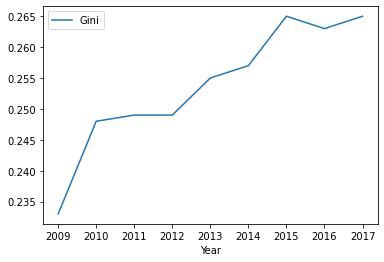

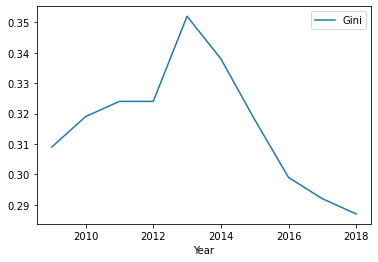

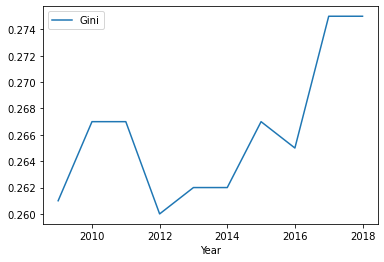

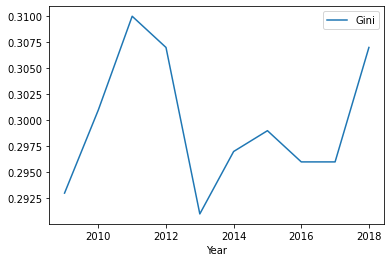

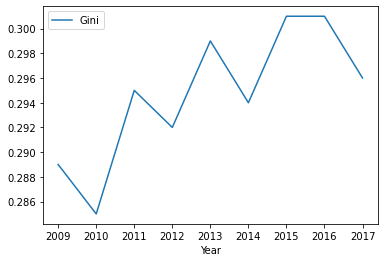

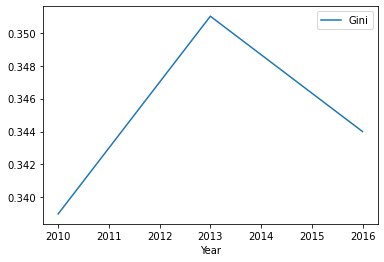

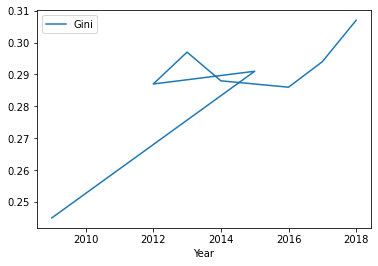

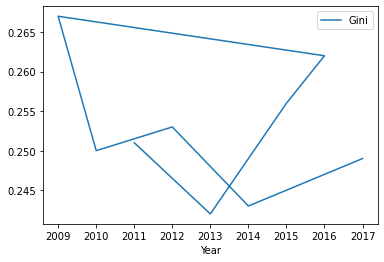

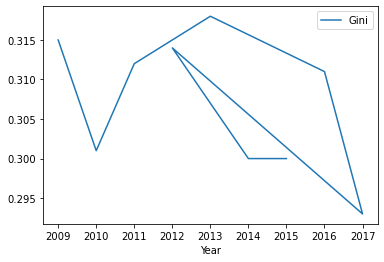

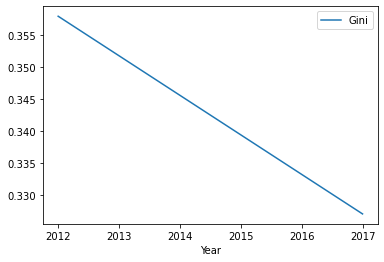

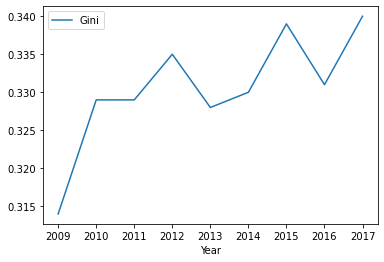

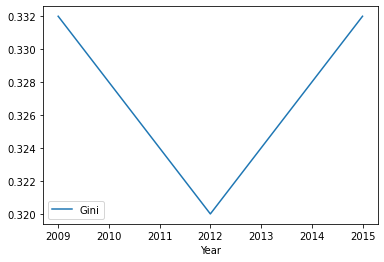

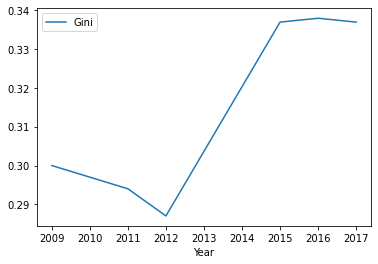

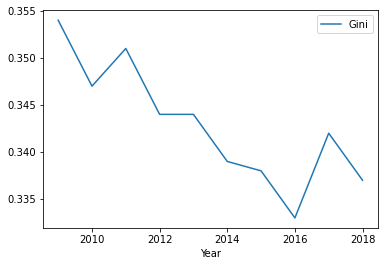

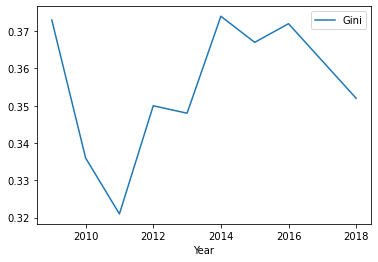

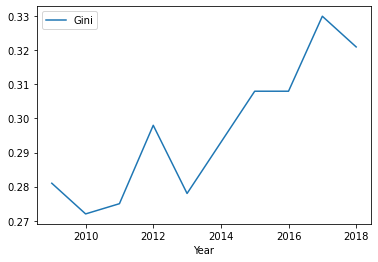

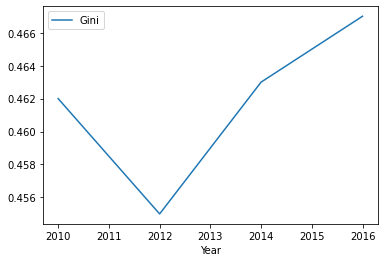

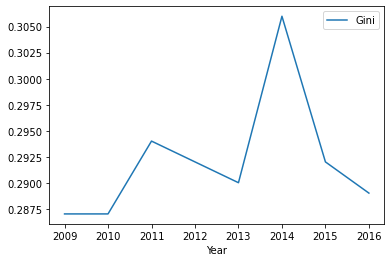

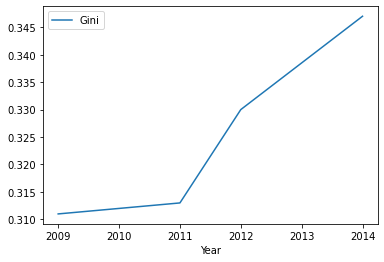

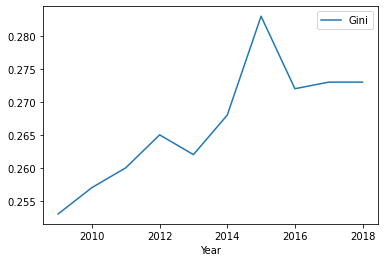

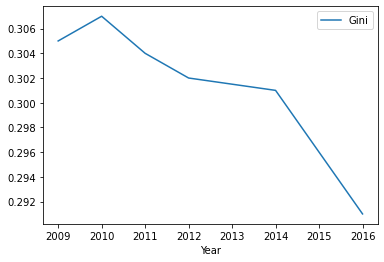

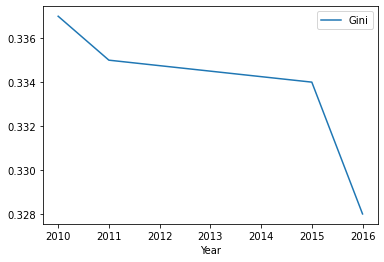

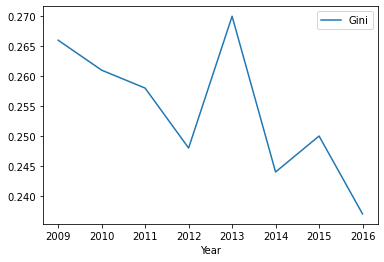

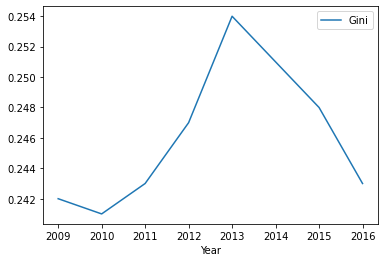

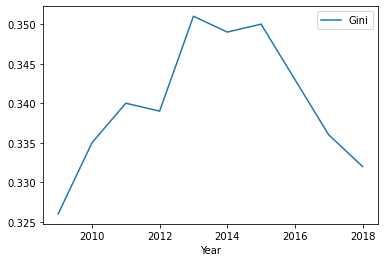

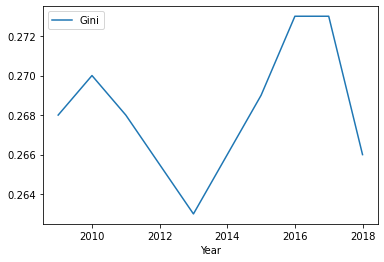

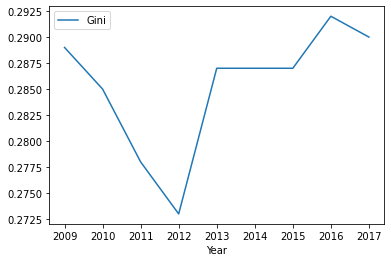

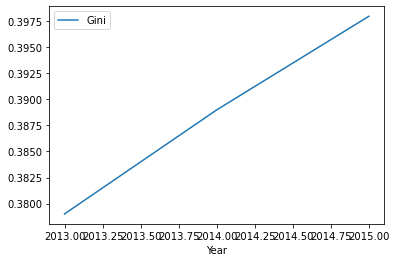

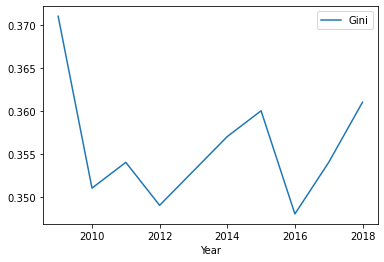

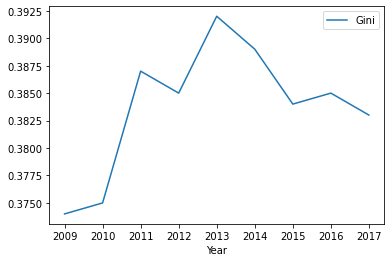

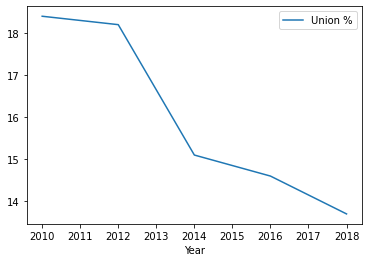

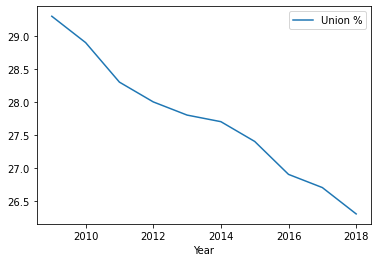

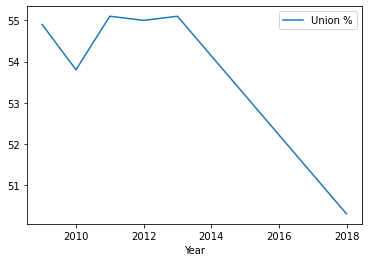

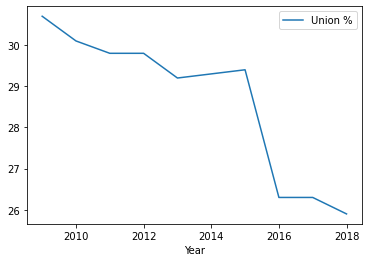

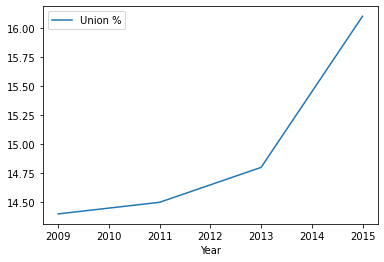

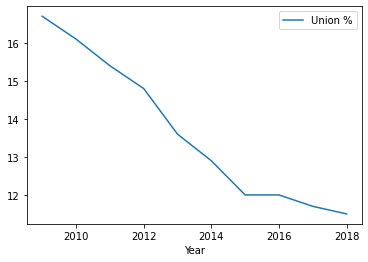

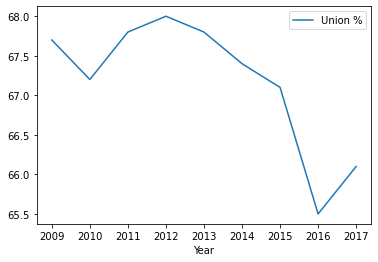

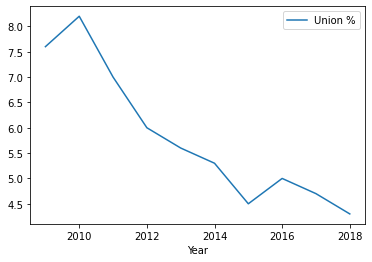

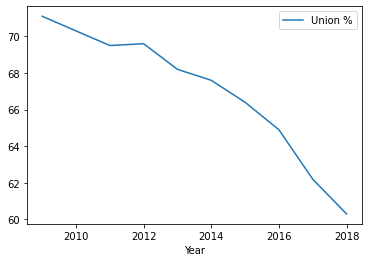

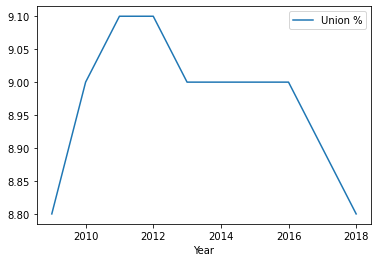

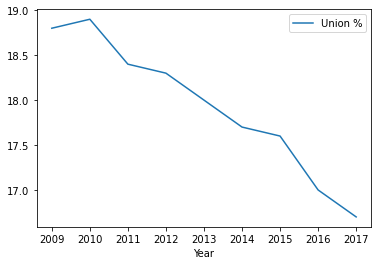

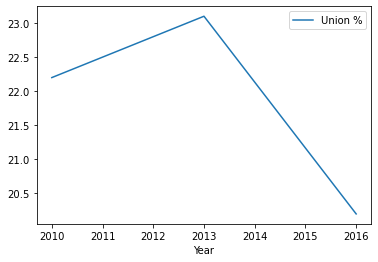

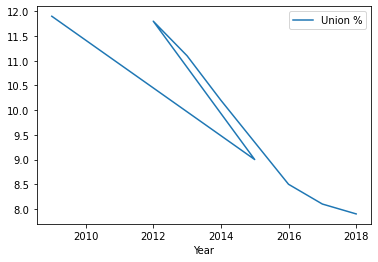

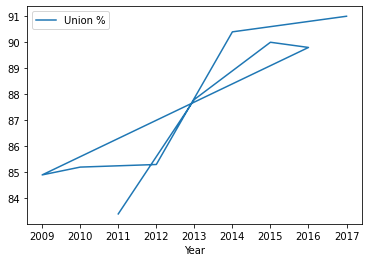

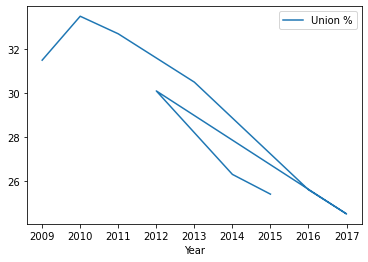

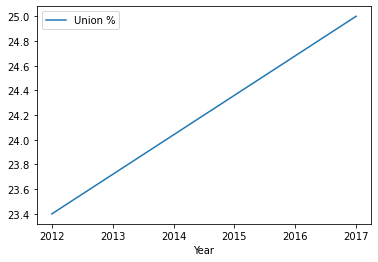

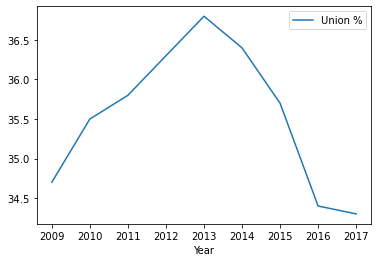

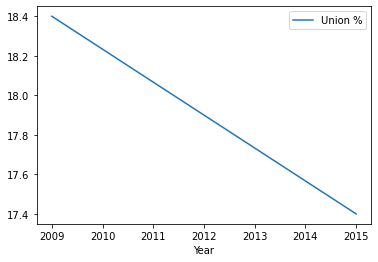

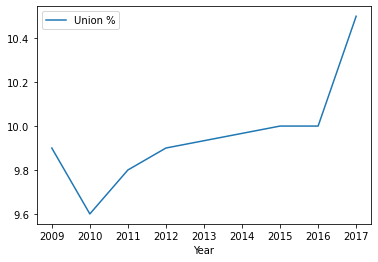

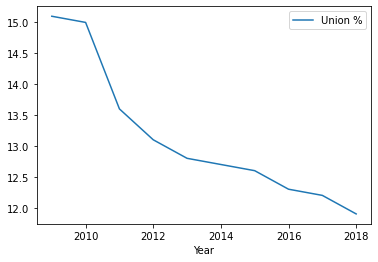

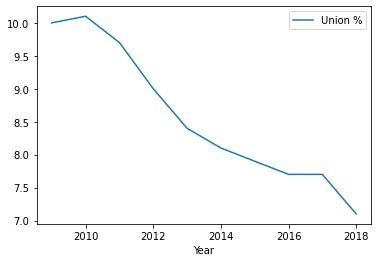

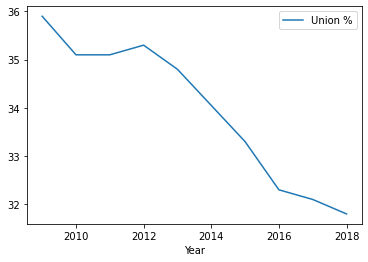

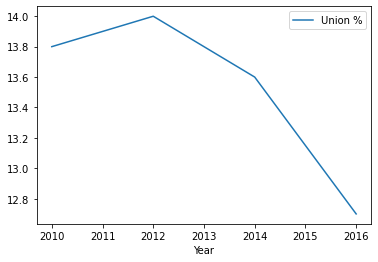

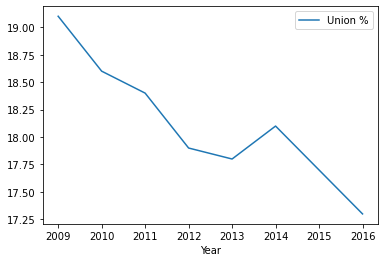

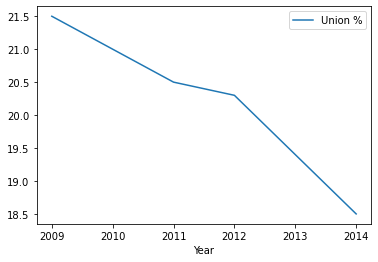

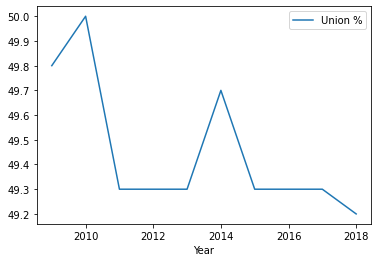

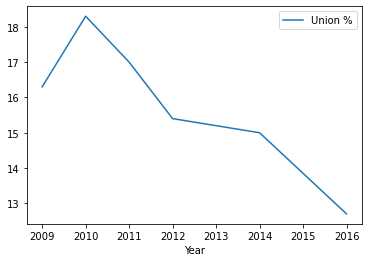

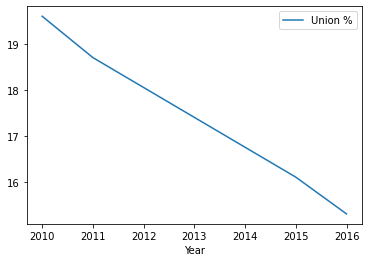

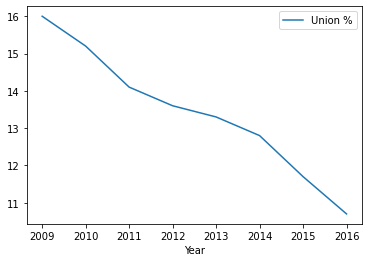

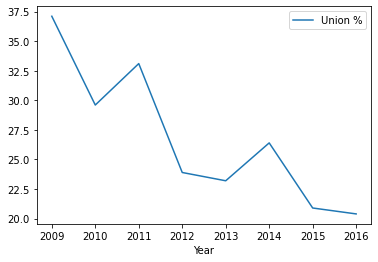

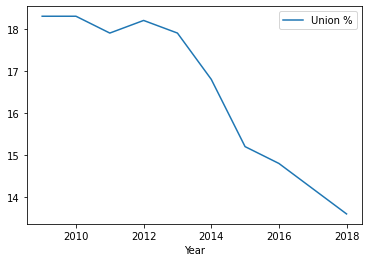

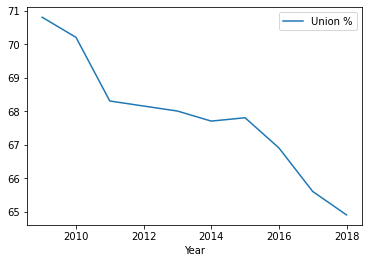

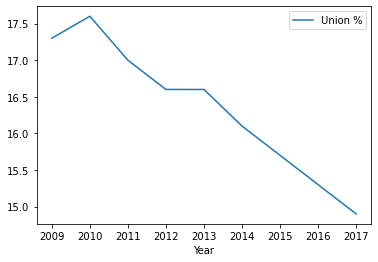

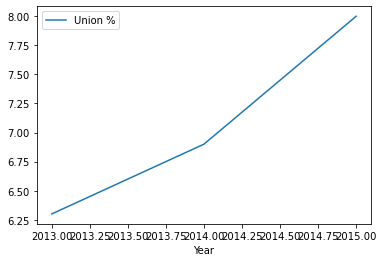

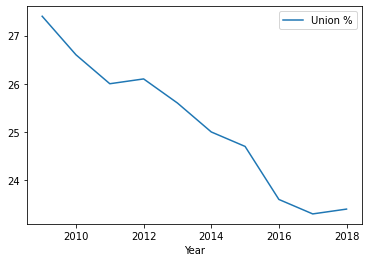

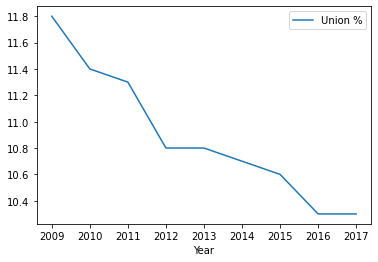

In [95]:
by_country = data_working.groupby(["Country"])
plt.figure()
by_country.plot.line(x="Year", y="Gini")
by_country.plot.line(x="Year", y="Union %")

<AxesSubplot:>

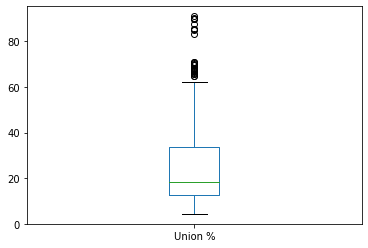

In [96]:
data_working["Union %"].plot.box()

<AxesSubplot:xlabel='Year'>

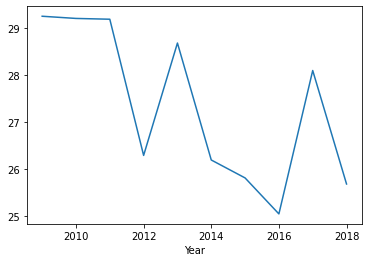

In [97]:
data_working.groupby(["Year"]).mean()["Union %"].plot.line()

<AxesSubplot:xlabel='Year'>

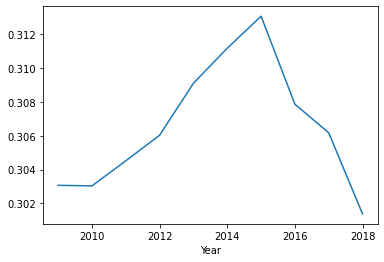

In [98]:
data_working.groupby(["Year"]).mean()["Gini"].plot.line()

<AxesSubplot:xlabel='Year'>

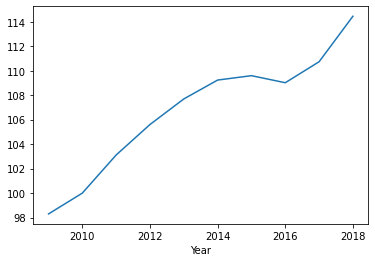

In [99]:
data_working.groupby(["Year"]).mean()["CPI"].plot.line()

<AxesSubplot:>

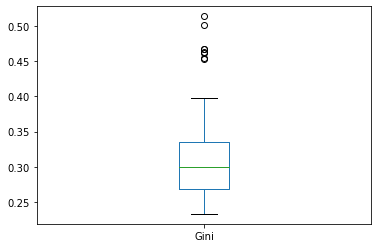

In [100]:
data_working[["Gini"]].plot.box()

In [101]:
retire = df_09_18[df_09_18["Age group"] == "Retirement age population: above 65"]

gini_retire = retire[retire["MEASURE"] == "GINI"]
gini_retire = gini_retire.drop_duplicates(subset=["Country","Year"])

cpi_retire = retire[retire["MEASURE"] != "GINI"]
cpi_retire = cpi_retire.drop_duplicates(subset=["Country","Year"])

data_retire = pd.merge(gini_retire, cpi_retire, on=["Country", "Year"])\
                        .drop(columns=["MEASURE_x", "Age group_x", "Value_union_y", "MEASURE_y", "Age group_y"])
data_retire = data_retire.rename(columns = {
                                                "Value_union_x": "Union %",
                                                "Value_gini_cpi_x": "Gini",
                                                "Value_gini_cpi_y": "CPI"
                                            })
data_retire.head()


,Country,Year,Union %,Gini,CPI
0,Hungary,2009,11.9,0.196,95.369304
1,Hungary,2015,9.0,0.233,111.384411
2,Poland,2009,16.3,0.262,97.484226
3,Poland,2010,18.3,0.261,100.000000
4,Poland,2011,17.0,0.255,104.239401
